In [1]:
# Libraries: Standard ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library for boxplots
import seaborn as sns

# K-means function
from sklearn.cluster import KMeans

# Functions for silhouette
from sklearn.metrics import silhouette_samples, silhouette_score

# Function to standardize the data 
from sklearn.preprocessing import scale

# Functions for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# Part1: Data presentation

## Question 1

In [2]:
# Load the data: food
food = pd.read_csv("food.csv",sep=";")
# print(food)
food.describe() # Statistical summary of the data

,Energy,Protein,Fat,Calcium,Iron
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,207.407407,19.000000,13.481481,43.962963,2.381481
std,101.207806,4.251696,11.257033,78.034254,1.461305
min,45.000000,7.000000,1.000000,5.000000,0.500000
25%,135.000000,16.500000,5.000000,9.000000,1.350000
50%,180.000000,19.000000,9.000000,9.000000,2.500000
75%,282.500000,22.000000,22.500000,31.500000,2.600000
max,420.000000,26.000000,39.000000,367.000000,6.000000


In [3]:
# Load the data: ruspini
ruspini = pd.read_csv("ruspini.csv",sep=",")
#print(ruspini)
ruspini.describe() # Statistical summary of the data

,Unnamed: 0,x,y
count,75.000000,75.00000,75.000000
mean,38.000000,54.88000,92.026667
std,21.794495,30.50253,48.702620
min,1.000000,4.00000,4.000000
25%,19.500000,31.50000,56.500000
50%,38.000000,52.00000,96.000000
75%,56.500000,76.50000,141.500000
max,75.000000,117.00000,156.000000


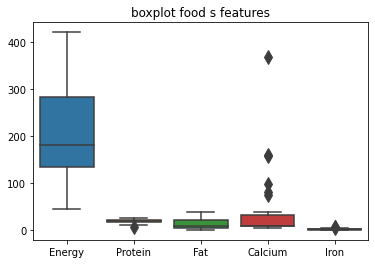

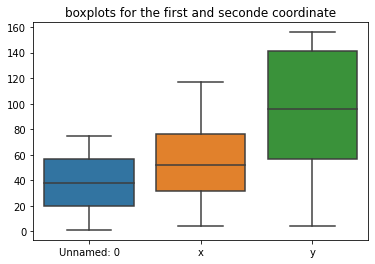

In [4]:
# Boxplot for food
plt.figure()
plt.title('boxplot food s features')
food_box=sns.boxplot(data=food,fliersize=10)   # fliersize is the size used to indicate the outliers
plt.show()


# Boxplot for ruspini
plt.figure()
plt.title('boxplots for the first and seconde coordinate')
ruspini_box=sns.boxplot(data=ruspini,fliersize=10)
plt.show()

__Remark__: With this representation, we do not visually extract some clusters. We however remark that, for food data, calcium shows a lot of outliers.

# Part2: Partitional clustering and quality of a clustering

## Question 2

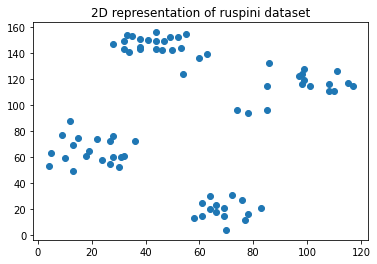

In [5]:
# Representation of Ruspini dataset
plt.title('2D representation of ruspini dataset')
plt.scatter(ruspini['x'],ruspini['y'])

__Remark__: In this case, we visually observe some clusters. We expect a clustering algorithm to find at least 4 clusters. There is one cluster (left, top) which may be a little difficult to identify.

## Question 3

[[ 10.5         20.15        64.95      ]
 [ 68.          68.93333333  19.4       ]
 [ 52.          98.17647059 114.88235294]
 [ 32.          43.91304348 146.04347826]]


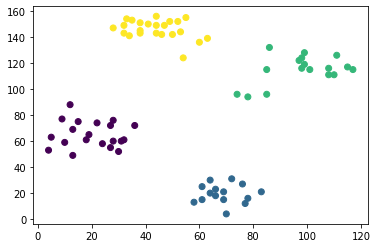

In [6]:
# We run a K-means algorithm onto the ruspini dataset, and display the centers
kmeans = KMeans(n_clusters=4,n_init=1,init='random').fit(ruspini)
centers=kmeans.cluster_centers_
print(centers)

# We also represent the data in 2D-space with colors corresponding to cluster
kmeans.labels_
plt.scatter(ruspini['x'], ruspini['y'],c=kmeans.labels_)

__Remark__: By launching the K-means algorithm several times, we observe that the clustering is not always the same, and does not always succeed. This is because of the random initialization of the K-means algorithm.

## Question 4

[[ 52.          98.17647059 114.88235294]
 [ 10.5         20.15        64.95      ]
 [ 32.          43.91304348 146.04347826]
 [ 68.          68.93333333  19.4       ]]


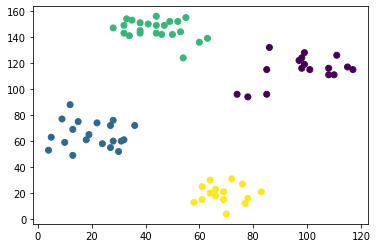

In [7]:
# We choose a larger number of initializations in order to reduce the random effect
kmeans_multiple = KMeans(n_clusters=4,n_init=40,init='random').fit(ruspini)
centers=kmeans_multiple.cluster_centers_
print(centers)

# We also represent the data in 2D-space with colors corresponding to cluster
kmeans_multiple.labels_
plt.scatter(ruspini['x'], ruspini['y'],c=kmeans_multiple.labels_)

__Remark__: It is supposed to be more stable with more initializations. Honnestly, when I set n_init=1, I mostly find a good solution.

## Question 5

In [14]:
# Compute the silhouette index for each cluster number
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n in range_n_clusters:
    clusterer = KMeans(n_clusters=n, n_init=10).fit(ruspini) # Clustering with the given number of clusters
    cluster_labels = clusterer.labels_ # Extract the labels
    silhouette_avg = silhouette_score(ruspini, cluster_labels) # Corresponding silhouette score
   
    # Display the results
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.5393208837562198
For n = 3 Silhouette_score: 0.6570531855325802
For n = 4 Silhouette_score: 0.7459402473705687
For n = 5 Silhouette_score: 0.7027786230562486
For n = 6 Silhouette_score: 0.6186953517303782
For n = 7 Silhouette_score: 0.5135079610128102
For n = 8 Silhouette_score: 0.520799339470404
For n = 9 Silhouette_score: 0.512567849702642
For n = 10 Silhouette_score: 0.41967750110923807


__Remark__: We want to maximize the Silhouette score. We see that the maximum is obtained for n=4, which seems reasonable. 

# Part3: Hierarchical clustering

In [15]:
# We now apply K-means onto the food dataset. For data visualization of the food dataset, see Question 1.
# We first remove the column name, which cannot be clustered.
my_food = food.drop(['Name'], axis=1)

# We apply K-means algorithm and calculate Silhouette index for a given number of clusters
# (Remark: it is a little difficult to visualize, since it is dimension 5)
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n in range_n_clusters:
    kmeans_food = KMeans(n_clusters=n, n_init=10).fit(my_food) # Clustering with the given number of clusters
    cluster_labels = kmeans_food.labels_ # Extract the labels
    silhouette_avg = silhouette_score(my_food, cluster_labels) # Corresponding silhouette score
   
    # Display the results
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.5275761268378671
For n = 3 Silhouette_score: 0.5583378267953667
For n = 4 Silhouette_score: 0.5468275112343609
For n = 5 Silhouette_score: 0.49999603015348426
For n = 6 Silhouette_score: 0.5288129792857025
For n = 7 Silhouette_score: 0.5276307542955673
For n = 8 Silhouette_score: 0.5116956926930514
For n = 9 Silhouette_score: 0.4928214246881057
For n = 10 Silhouette_score: 0.43841379368537275


__Remark__: n=3 seems to be the best solution, but the silhouette scores for different number of clusters are close to each other. Probably in this case, K-means does not work well.

## Question 7

In [11]:
# We now perform hierarchical clustering. 

# We standardize the columns of interest
food_scaled=pd.DataFrame(scale(my_food),columns=my_food.columns,index=my_food.index)  # scale(food) returns a numpy array, so use pd.Dataframe to reconstruct your dataframe
# print(food_scaled)

# We apply hierarchical clustering with dissimilarity measure "ward"
Z = linkage(food_scaled, 'ward') # 'average' is the method used to compute the distance. Metric is "euclidian" by default
print(Z)

[[ 0.         10.          0.06973555  2.        ]
 [11.         12.          0.18939102  2.        ]
 [ 6.         25.          0.21915945  2.        ]
 [27.         28.          0.41581508  4.        ]
 [ 1.          8.          0.4202579   2.        ]
 [ 3.         30.          0.57241854  5.        ]
 [ 4.         14.          0.75192779  2.        ]
 [20.         22.          0.78097139  2.        ]
 [ 5.         15.          0.79940943  2.        ]
 [18.         19.          0.80176192  2.        ]
 [21.         23.          0.94966792  2.        ]
 [ 9.         32.          0.95589543  6.        ]
 [13.         31.          1.02636494  3.        ]
 [16.         17.          1.08097041  2.        ]
 [29.         35.          1.6079578   4.        ]
 [26.         33.          1.84265596  3.        ]
 [34.         36.          1.92586168  4.        ]
 [ 2.         38.          2.11474542  7.        ]
 [41.         42.          2.47824624  7.        ]
 [37.         43.          3.02

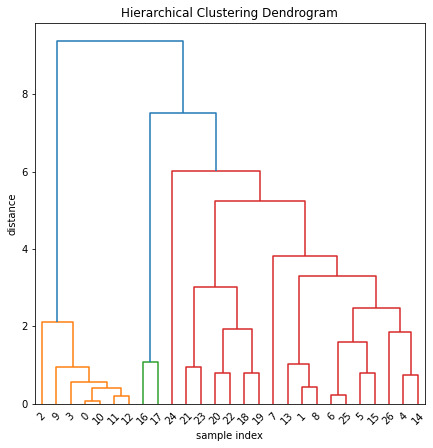

In [12]:
# We represent the corresponding Dendrogram
plt.figure(figsize=(7, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z = linkage(food_scaled, 'ward')
)
plt.show()

## Question 8

In [13]:
metrics=['euclidean','hamming', 'cityblock' , 'cosine'] # metrics used for linkage 
methods=['single','complete','average'] # methods used for linkage
pdists=['euclidean','minkowski','cityblock','cosine']  # metrics used for pdist()
max_val=0
best_metric=None
best_method=None
best_p_dist=None

for metric1 in metrics:
    for method1 in methods:
        for pdist1 in pdists:
            Z=linkage(food_scaled,method1,metric=metric1)
            c, coph_dists = cophenet(Z, pdist(food_scaled,pdist1))
            if (c>max_val):
                max_val=c
                best_metric=metric1
                best_method=method1
                best_p_dist=pdist1
            else:
                max_val=max_val
            print('(',method1,',',metric1,',',pdist1,') :',c)
print('the best cophenet index is about :',max_val,'which corresponds to the triple: (metric=',best_metric,',method=',best_method,'and pdist=',best_p_dist,')')

( single , euclidean , euclidean ) : 0.7749300289356731
( single , euclidean , minkowski ) : 0.7749300289356731
( single , euclidean , cityblock ) : 0.7319624291223596
( single , euclidean , cosine ) : 0.29720215086955576
( complete , euclidean , euclidean ) : 0.7136761439194088
( complete , euclidean , minkowski ) : 0.7136761439194088
( complete , euclidean , cityblock ) : 0.6986503309209111
( complete , euclidean , cosine ) : 0.5635440964728377
( average , euclidean , euclidean ) : 0.864670129695814
( average , euclidean , minkowski ) : 0.864670129695814
( average , euclidean , cityblock ) : 0.793164600040733
( average , euclidean , cosine ) : 0.46075921503405687
( single , hamming , euclidean ) : 0.2771964328633425
( single , hamming , minkowski ) : 0.2771964328633425
( single , hamming , cityblock ) : 0.2809623363988014
( single , hamming , cosine ) : 0.29764837142270345
( complete , hamming , euclidean ) : 0.3654986654600873
( complete , hamming , minkowski ) : 0.3654986654600873


__Remark__: Here we used the cophenet index. It would be interesting to also look at the silhouette index. This would allow for comparison with K-means results.